In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import fetch_lfw_people

In [7]:
faces = fetch_lfw_people()

In [8]:
# visualize the data
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [9]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

In [14]:
def plot_faces(faces):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47),
                 cmap='bone')
    plt.show()

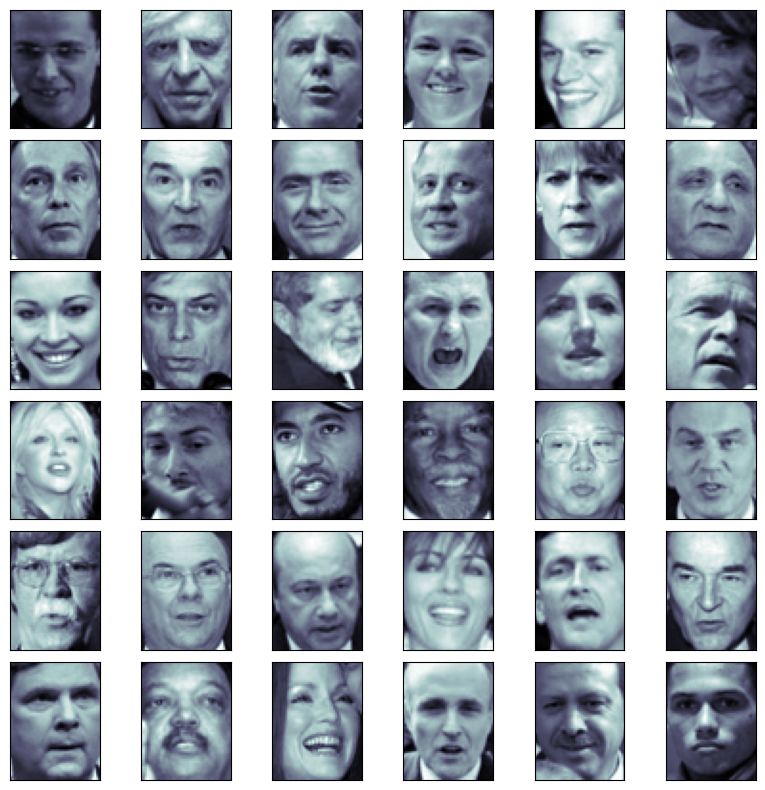

In [15]:
plot_faces(example_faces)

In [18]:
%%time
from sklearn.decomposition import PCA

# 随机求解PCA，因为数据较大，这样可以加速
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: total: 1min 33s
Wall time: 26.8 s


PCA(svd_solver='randomized')

In [19]:
# 将其主成分的每一行都看作一个样本
# 排的越靠前的 特征脸 越反映一个人脸的 特征
pca.components_.shape

(2914, 2914)

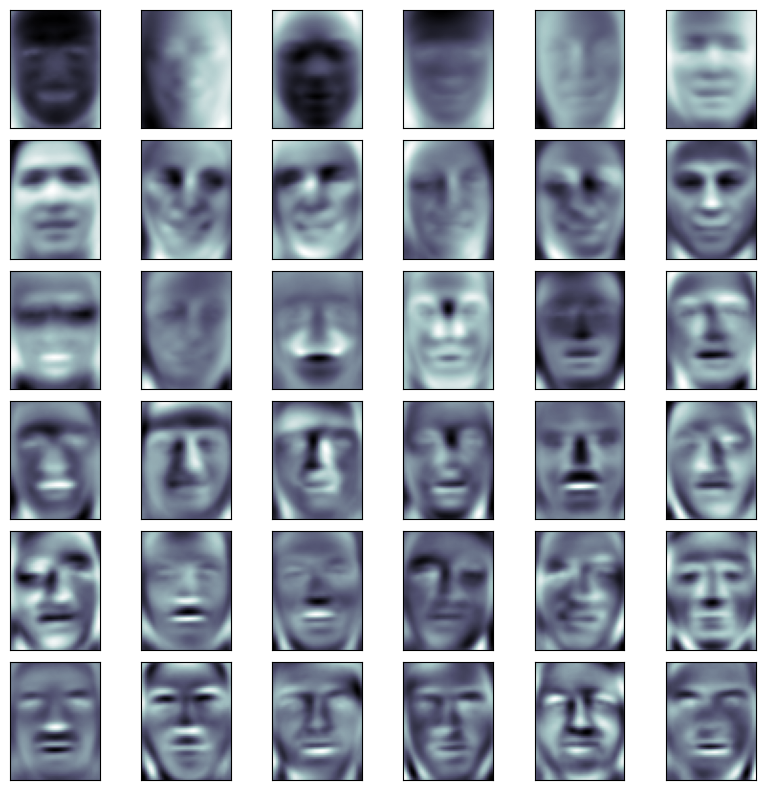

In [20]:
# 取前36张脸的特征
# 即看下 人脸的范围 在哪里，越后五官越清晰
# 也就是，降维后，用少量数据识别出特征脸
plot_faces(pca.components_[:36, :])